In [751]:
import math
import numpy as np
import matplotlib.pyplot as plt
# trajectories of I(n) and dI(n)
def fig2(k_T, k, x, delta):
    '''ODE system modeling a single optical nonlinear resonator
    Args:
        k_T: w0/Q, total linewidth of the resonator given its resonance angular frequency ω0 and loaded
quality factor Q
        k_W: waveguid linewidth
        k_L: loss linewidth
        k_T = k_W + k_L
        -----
        delta: delta = w0-w, the detuning of the resonance frequency from the drive field
        x: Chi, dispersive non-linear coefficient, strength of the optical Kerr effect, defined as the angular
frequency shift per photon inside the resonator.
        u: coherent drive/input amplitude, normalized to sqr(# Photons/time)
           input flux I = |u|^2
        z: complex mode amplitude of Kerr-nonlinear resonator, represents dynamics of a single resonant mode
           number of photons n := |z|^2
    return: n vs u
    '''
    a = x**2 / k
    b = 2*delta*x /k
    c = (k_T**2 /4 + delta**2)/k
    d = 0
    p0=153.63*math.sqrt(abs(x))
    lower_limit = 0
    upper_limit = 400
    num_pts = 200
    n = np.linspace(lower_limit, upper_limit, num_pts)
    I = np.polyval([a,b,c,d], n)
    u = [math.sqrt(i) for i in I]
    plt.xlabel('Pump amplitude p')
    plt.ylabel('Energy cavity n')
    plt.plot(u, n)
    return 0
    
        

[-121.2435565298214, -173.20508075688772, -225.16660498395404]


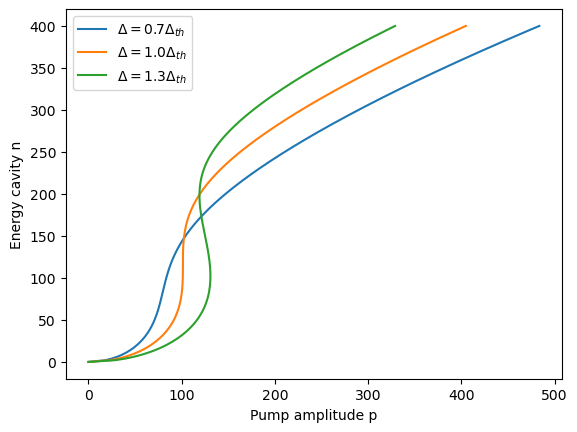

In [753]:
x = 1
k=150
k_l=50
K = k * abs(x)
K_T=(k+k_l)*abs(x)
Delta_th= -math.sqrt(3)/2.0 * K_T
#Delta=-225.17*x # 1.3K_T
Delta=[0.7*Delta_th, 1.0*Delta_th, 1.3*Delta_th]
print(Delta)
for i in Delta:    
    fig2(K_T, K, x, i)
plt.legend(["$\Delta = {:.1f} \Delta_{{th}}$".format(i/Delta_th) for i in Delta])
   

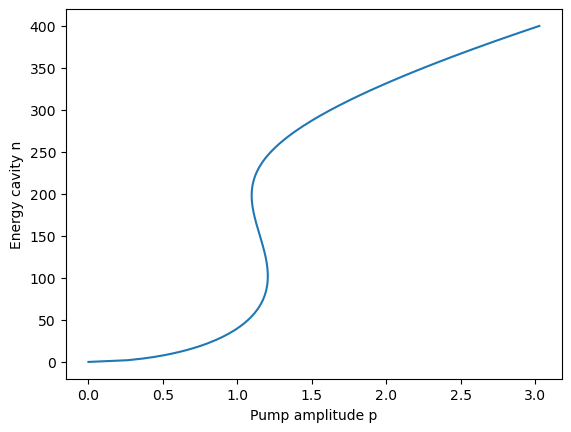

In [508]:
def polynom(k_T, k, x, delta,n):
    a = (x)**2 / (k/2)  #changed according to formel (30) (32)
    b = 2*delta*x /(k/2)
    c = (k_T**2 /4 + delta**2)/(k/2)
    d = 0
    I = np.polyval([a,b,c,d], n)
    u = [math.sqrt(i)/153.63 for i in I]
    plt.xlabel('Pump amplitude p')
    plt.ylabel('Energy cavity n')
    plt.plot(u, n)
x = 1
k=150
k_l=50
K = k * abs(x)
K_T=(k+k_l)*abs(x)
Delta=-225.17*x # 1.3K_T
lower_limit = 0
upper_limit = 400
num_pts = 200
n = np.linspace(lower_limit, upper_limit, num_pts)
polynom(K_T, K, x, Delta,n)
#plt.axvline(x=0.937, color='y', linestyle='--')
#plt.axvline(x=1.157, color='y', linestyle='--')

High power is 31602.878719307675, low power is 20731.909691507313.
K is 150, K_t is 200, K_feedback is 191.6370106761566, K_t_feedback is 241.6370106761566, Delta is 225.17, Delta_feedback is 171.78921708185052.
[102.21761726 198.01094225] [-0. -0.]


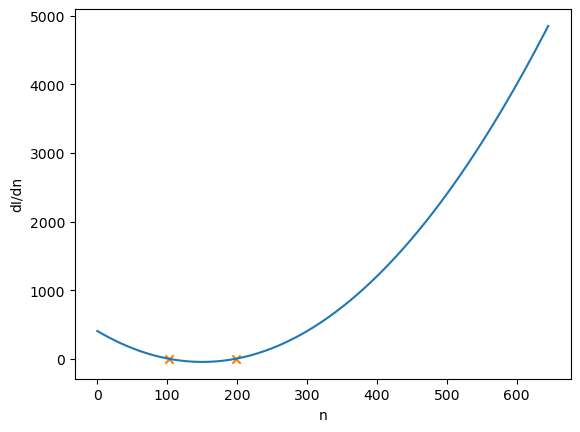

turning point for single ring[102.21761726 198.01094225]
Low/high power threshold for single ring[0.8515841954905865, 0.7749556294518108]
204.30649406928694 396.1468392640463 1.1571436906370565 0.9372244798509755
Low power for single ring p1_square <0.7251956420093496
High power for single ring p2_square >0.6005562276190524
p1_square + p2_square = p_square in range (0.8783897256319316,1.3389815207811477)


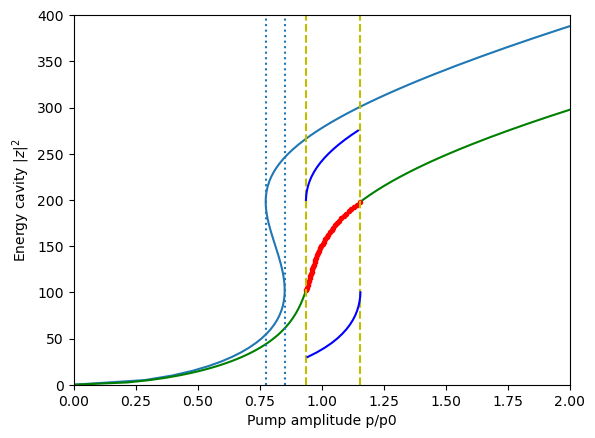

In [745]:
import numpy.ma as ma
from intersect import intersection
def test (k, k_l, delta, re_r, im_r, x):
    r=complex(re_r,im_r)
    K = k * abs(x)
    K_t=(k+k_l)*abs(x)
    K_feedback=((1+r)/(1-r)).real*k*abs(x)
    K_t_feedback= (((1+r)/(1-r)).real*k+k_l)*abs(x)
    Delta=delta*x
    Delta_feedback=Delta+ (r/(1-r)).imag *k*abs(x)
    s_tilde_square_minus= -4*Delta/(3*x) - math.sqrt(4*(Delta**2)/(9*(abs(x)**2))-(K_t**2)/(3*(abs(x)**2)))
    s_tilde_square_plus= -4*Delta/(3*x) + math.sqrt(4*(Delta**2)/(9*(abs(x)**2))-(K_t**2)/(3*(abs(x)**2)))
    u_square_plus = ((x**2*s_tilde_square_plus**3)/4+Delta_feedback*x*s_tilde_square_plus**2+((K_t_feedback**2)/4+Delta_feedback**2)*s_tilde_square_plus)/K_feedback
    u_square_minus = ((x**2*s_tilde_square_minus**3)/4+Delta_feedback*x*s_tilde_square_minus**2+((K_t_feedback**2)/4+Delta_feedback**2)*s_tilde_square_minus)/K_feedback
    
    print(f'High power is {u_square_plus}, low power is {u_square_minus}.')
    print(f'K is {K}, K_t is {K_t}, K_feedback is {K_feedback}, K_t_feedback is {K_t_feedback}, Delta is {Delta}, Delta_feedback is {Delta_feedback}.')
    
    a = (x/2)**2 /( K_feedback)  # changed according to (43), s=s_tilde since y=z 
    b = Delta_feedback*x /K_feedback # changed according to (43)
    c = (K_t_feedback**2 /4 + Delta_feedback**2)/K_feedback
    d = 0
    p0=153.63*math.sqrt(abs(x))
    lower_limit = 0
    upper_limit = 650
    num_pts = 50
    #n = np.linspace(lower_limit, upper_limit, num_pts)
    # collect points between two threshold
    #split=[]
    s0_tilde_square=np.arange(lower_limit, upper_limit, 5) # s0_tilder_square = 2*z_square/y_square
    ########################################
    ## plot the split part
    ## (high n,low n) or (low n, high n), 
    a_split = (x)**2 /(K)   
    b_split = 2*Delta*x /( K) 
    c_split = (K_t**2 /4 + Delta**2)/(K)
    d_split = 0
    I_split = np.polyval([a_split,b_split,c_split,d_split], s0_tilde_square)
    u_split = [math.sqrt(i)/p0 for i in I_split]
    
    dI_split = np.polyval([3*a_split,2*b_split,c_split], s0_tilde_square)
    h=[0]*len(s0_tilde_square)
    plt.plot(s0_tilde_square, dI_split)
    x1, y1 = intersection(s0_tilde_square, dI_split, s0_tilde_square, h)
    if x1.any():
        print(x1,y1)
        plt.scatter(x1,y1, color = 'tab:orange', marker ='x')
    plt.xlabel('n')
    plt.ylabel('dI/dn')
    plt.show()
    # the pumping threshold for single ring
    print(f'turning point for single ring{x1}')
    I_split_each=(np.polyval([a_split,b_split,c_split,d_split], x1))
    p_12 = [math.sqrt(m)/p0 for m in I_split_each]
    print(f'Low/high power threshold for single ring{p_12}')
    
    ## p^2 = p1^2 + p2^2
    ## p1 < p_low_power_threshold, p2> p_high_power_threshold (for single ring each)
    #######################################################
    plt.plot(u_split, s0_tilde_square)
    
    
    I = np.polyval([a,b,c,d], s0_tilde_square)
    u = [math.sqrt(i)/p0 for i in I]
    u_array= ma.array(u)
    plt.xlabel('Pump amplitude p/p0')
    plt.ylabel('Energy cavity $|z|^2$')
    u_th_plus = math.sqrt(u_square_plus)/p0
    u_th_minus = math.sqrt(u_square_minus)/p0
    print(s_tilde_square_minus, s_tilde_square_plus, u_th_plus,u_th_minus)
    for index, value in enumerate(u):
        if value < u_th_plus and value > u_th_minus: 
            u_array[index]=ma.masked           
            plt.plot(value, s0_tilde_square[index]/2,'r.')
            
    plt.plot(u_array, s0_tilde_square/2, 'g')  # divided by 2 because s_square = 2 |z|^2
    plt.xlim(0,2)
    plt.ylim(0,400)
    plt.axvline(x=u_th_minus, color='y', linestyle='--')
    plt.axvline(x=u_th_plus, color='y', linestyle='--')
    plt.axvline(x=p_12[0], color='tab:blue', linestyle='dotted')
    plt.axvline(x=p_12[1], color='tab:blue', linestyle='dotted')
    
    ## between u_square_minus and u_square_plus, it exists:
    ## u^2 = p1^2 + p2^2 (pi^2 = I_split_each)
    ## p1 < p_low_power_threshold, p2> p_high_power_threshold (for single ring each)
    print(f'Low power for single ring p1_square <{I_split_each[0]/(p0**2)}')
    print(f'High power for single ring p2_square >{I_split_each[1]/(p0**2)}')
    print(f'p1_square + p2_square = p_square in range ({u_square_minus/(p0**2)},{u_square_plus/(p0**2)})')
    ## for example, 
    # high power
    u_split_high = [i+(u_th_minus-p_12[1]) for i in u_split]
    #plt.plot(u_split_high, s0_tilde_square)
    u_split_high_array=ma.array(u_split_high)
    s0_tilde_square_array1=ma.array(s0_tilde_square)
    for index, value in enumerate(s0_tilde_square): 
        if value < x1[1]: 
            s0_tilde_square_array1[index]=ma.masked
    for index, value in enumerate(u_split_high):  
        if value > u_th_plus:
            u_split_high_array[index]=ma.masked
    plt.plot(u_split_high_array, s0_tilde_square_array1, "b")

    u_split_low = [i+(u_th_plus-p_12[0]) for i in u_split]
    u_split_low_array=ma.array(u_split_low)
    s0_tilde_square_array2=ma.array(s0_tilde_square)
    for index, value in enumerate(s0_tilde_square): 
        if value > x1[0]: 
            s0_tilde_square_array2[index]=ma.masked
    for index, value in enumerate(u_split_low):  
        if value < u_th_minus:
            u_split_low_array[index]=ma.masked
    plt.plot(u_split_low_array, s0_tilde_square_array2, "b")
        

   #p=[]
   #xi_ss_plus=[]
   #xi_ss_minus=[]
   #for i in [s_tilde_square_minus+0.0001, s_tilde_square_plus-0.0001]:
   #    a_xi = -K_t/2.0 * (1+ ((x*i)/K_t)*math.sqrt(1.0-4.0*((1.0+Delta/(x*i))**2)))
   #    b_xi = 1.0/i*((Delta+x*i)/math.sqrt(1.0-4.0*((1.0+Delta/(x*i))**2)))   # only valid near xi=0
   #    c_xi= 1.0/(i**2*4) * (x*i) /math.sqrt((1.0-4.0*((1.0+Delta/(x*i))**2))**3) # only valid near xi=0
   #    print(a_xi,b_xi,c_xi)
   #    if b_xi < 0: # supercritical
   #        xi_ss_plus.append(math.sqrt(a_xi/abs(b_xi)))
   #        xi_ss_minus.append(-math.sqrt(a_xi/abs(b_xi)))
   #        p_square = ((K_t_feedback**2/4 + (Delta_feedback+0.5*x*i)**2)*i)/K_feedback
   #        p.append(math.sqrt(p_square)/p0)
   #    if b_xi >0: # subcritical
   #        xi_ss_plus.append(math.sqrt(b_xi/abs(c_xi)))
   #        xi_ss_minus.append(-math.sqrt(b_xi/abs(c_xi)))
   #        p_square = ((K_t_feedback**2/4 + (Delta_feedback+0.5*x*i)**2)*i)/K_feedback
   #        p.append(math.sqrt(p_square)/p0)
   #plt.plot(p,[s_tilde_square_minus, s_tilde_square_plus],'x') 
   #plt.plot(p,xi_ss_plus,'x')
   #plt.plot(p,xi_ss_minus,'x')
test (150,50,-225.17,0.2,-0.25,-1)